In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn import tree
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

data = pd.read_csv("data.csv", header=None) #read the data
data.sample(5)  #see what the data look like

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
1238,35,135,3.8571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1101,82,192,2.3414,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1954,74,78,1.0540,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
888,100,149,1.4900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
727,75,234,3.1200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [2]:
## replace labels. AD = 1; nonAD = 0
data.replace('ad.', 1, inplace=True)
data.replace('nonad.', 0, inplace=True)

In [3]:
##  check missing values
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns:
        * total missing values
        * total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# apply the function to the data
missing_percentage(data)

,Total,Percent
1558,0,0.0
534,0,0.0
512,0,0.0
513,0,0.0
514,0,0.0
...,...,...
1041,0,0.0
1042,0,0.0
1043,0,0.0
1044,0,0.0


In [4]:
### create train and test sets
df_label = pd.DataFrame(data, columns=[1558]) #extra the last column which is the label
df_data = pd.DataFrame.drop(data, columns = [1558]) #delete the last label column

#30% data are splitted into test data set, they are shuffled
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size = 0.3, random_state = 40)

In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.0,1651.000000,1651.000000,1651.000000,1651.000000,...,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,63.448819,156.073289,3.959404,0.764991,0.001211,0.0,0.006663,0.004846,0.003634,0.014537,...,0.001817,0.003634,0.001211,0.001817,0.003028,0.009085,0.012114,0.013931,0.010902,0.001211
std,54.521547,131.833762,6.348432,0.424133,0.034794,0.0,0.081377,0.069462,0.060193,0.119725,...,0.042601,0.060193,0.034794,0.042601,0.054965,0.094912,0.109427,0.117240,0.103876,0.034794
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,80.000000,1.037500,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.086900,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,184.000000,5.333300,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Feature scaling
# As we can see, the change of first three factors is very large, and the last factors are binary
# Through feature scaling, all features could be  


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
## model 1: decision tree 

# set parameters
max_depth = range(1,30)
criterion = ["entropy"]
param = {'max_depth':max_depth, 'criterion':criterion}

# search the best parameters
grid = GridSearchCV(DecisionTreeClassifier(), param_grid= param, verbose=False, return_train_score=True)

grid.fit(X_train, y_train) #fit the model


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 30

In [7]:
## print parameters and scores
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 8}
0.9715389544996796
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [8]:
dt = grid.best_estimator_
dt.score(X_train, y_train)

0.9884918231374924

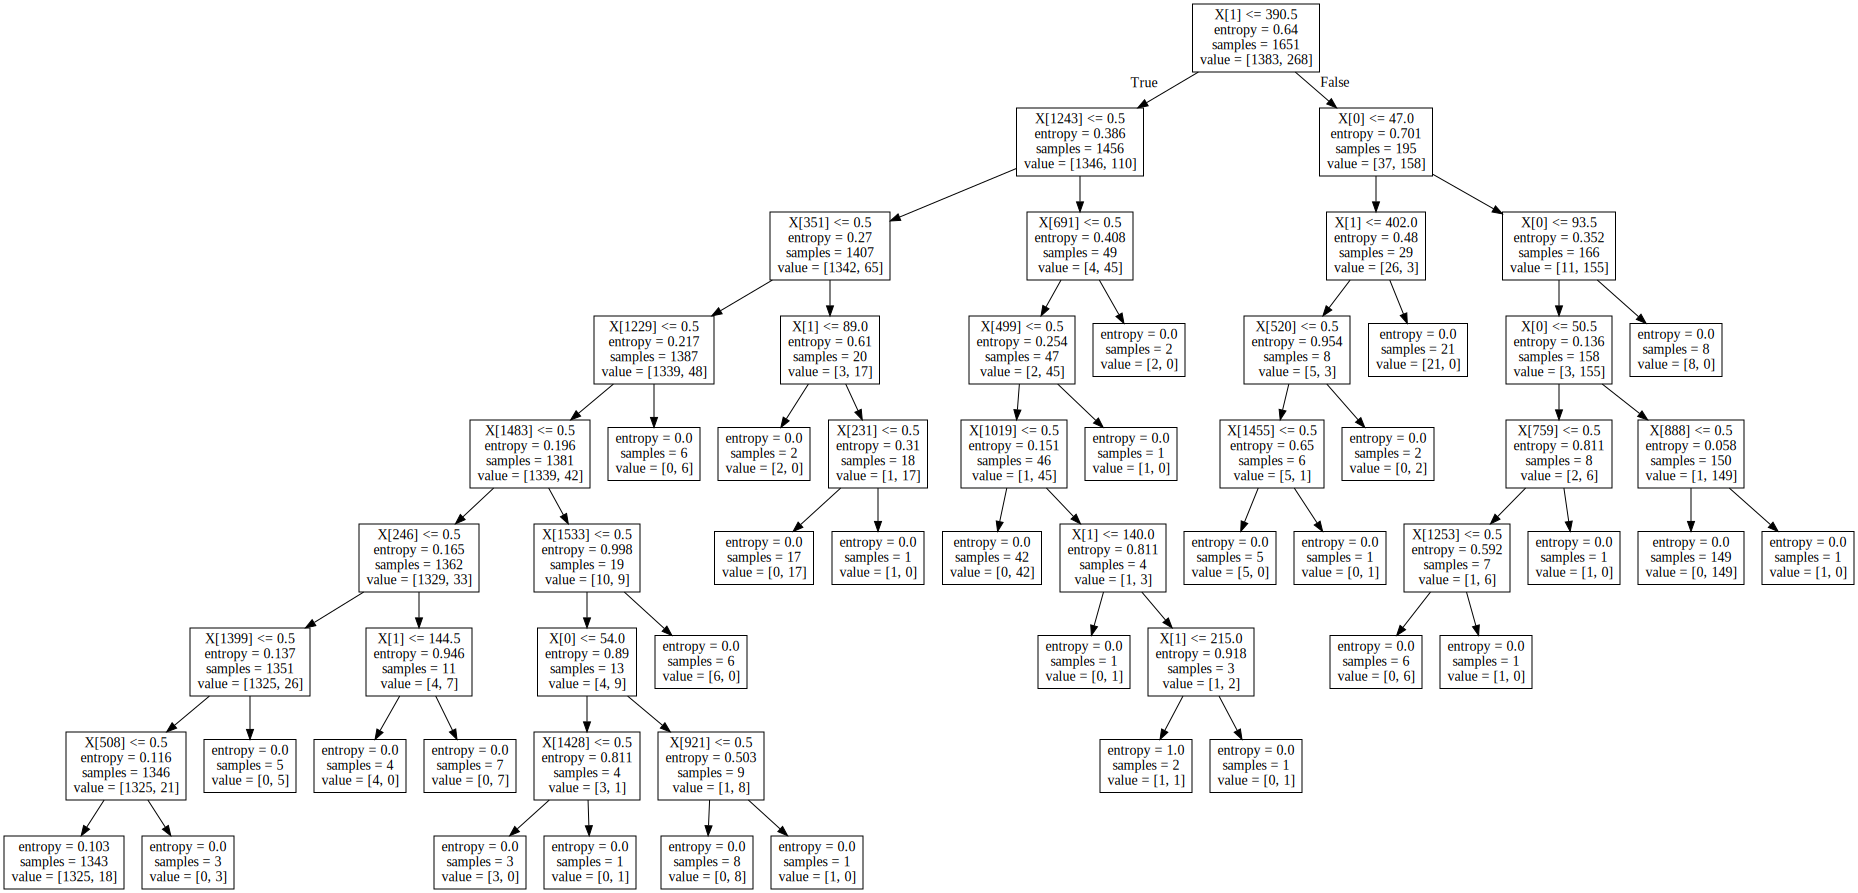

In [9]:
## show the decision tree
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decision_tree=dt, out_file=None)
graph = graphviz.Source(dot_data)
graph
# graph.render('dt')
# Image(graph.create_png())

In [10]:
y_pred = grid.predict(X_test)

In [11]:
## evaluate the model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, classification_report, f1_score

c_m = confusion_matrix(y_test, y_pred)
print(c_m)

dc_accuracy = accuracy_score(y_test, y_pred)
dc_precision = precision_score(y_test, y_pred)
dc_recall = recall_score(y_test, y_pred)
dc_f1 = f1_score(y_test, y_pred)
print("decision tree accuracy: %0.2f" %dc_accuracy)
print("decision tree precision: %0.2f" %dc_precision)
print("decision tree recall: %0.2f" %dc_recall)
print("decision tree f1: %0.2f" %dc_f1)

[[589   6]
 [ 21  92]]
decision tree accuracy: 0.96
decision tree precision: 0.94
decision tree recall: 0.81
decision tree f1: 0.87
